# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']# YOUR CODE HERE
        city_lng =  city_weather['coord']['lon']
        city_max_temp =  city_weather['main']['temp_max']
        city_humidity =  city_weather['main']['humidity']
        city_clouds =  city_weather['clouds']['all']
        city_wind =  city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date =  city_weather['dt']


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | manokwari
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | fuyang
Processing Record 6 of Set 1 | kirakira
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | shchigry
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | west island
Processing Record 11 of Set 1 | cruzeiro do sul
Processing Record 12 of Set 1 | nuuk
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | gorodishche
Processing Record 15 of Set 1 | duluth
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | o barco de valdeorras
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | p

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,9.81,50,0,10.80,AR,1702227977
1,albany,42.6001,-73.9662,13.18,88,100,0.89,US,1702228135
2,manokwari,-0.8667,134.0833,26.25,82,92,4.26,ID,1702228206
3,adamstown,-25.0660,-130.1015,21.02,62,75,5.24,PN,1702228206
4,fuyang,32.9000,115.8167,3.04,87,100,6.88,CN,1702228207


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,9.81,50,0,10.80,AR,1702227977
1,albany,42.6001,-73.9662,13.18,88,100,0.89,US,1702228135
2,manokwari,-0.8667,134.0833,26.25,82,92,4.26,ID,1702228206
3,adamstown,-25.0660,-130.1015,21.02,62,75,5.24,PN,1702228206
4,fuyang,32.9000,115.8167,3.04,87,100,6.88,CN,1702228207


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

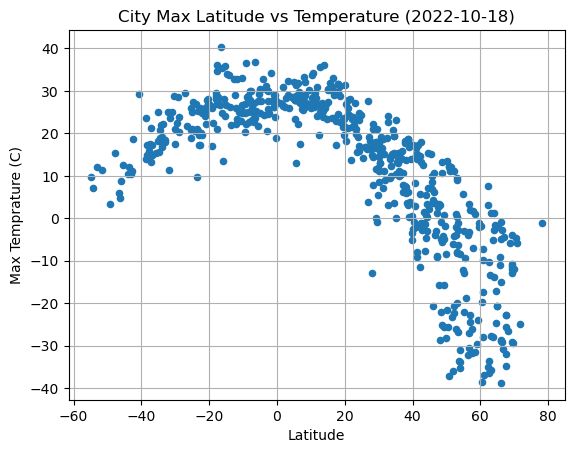

In [8]:
# Build scatter plot for latitude vs. temperature

lat_vs_temp = city_data_df.plot(kind="scatter",x="Lat", y="Max Temp",grid=True,title="City Max Latitude vs Temperature (2022-10-18)",xlabel="Latitude",ylabel="Max Temprature (C)")
lat_vs_temp.get_figure().savefig("../output_data/Latitude_vs_temprature.png")



#### Latitude Vs. Humidity

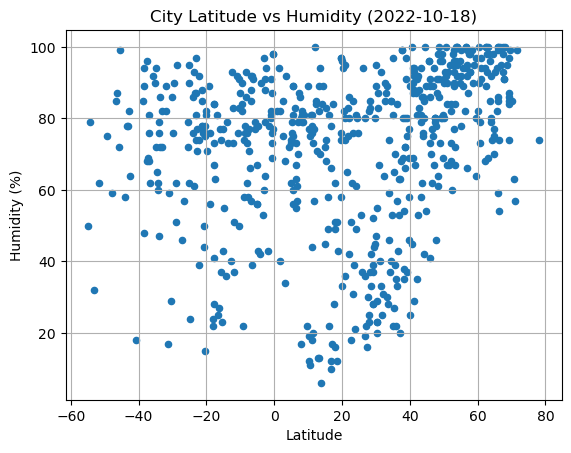

In [9]:
# Build the scatter plots for latitude vs. humidity
lat_vs_temp = city_data_df.plot(kind="scatter",x="Lat", y="Humidity",grid=True,title="City Latitude vs Humidity (2022-10-18)",xlabel="Latitude",ylabel="Humidity (%)")
lat_vs_temp.get_figure().savefig("../output_data/Latitude_vs_Humidity.png")

# Show plot
#plt.show()

#### Latitude Vs. Cloudiness

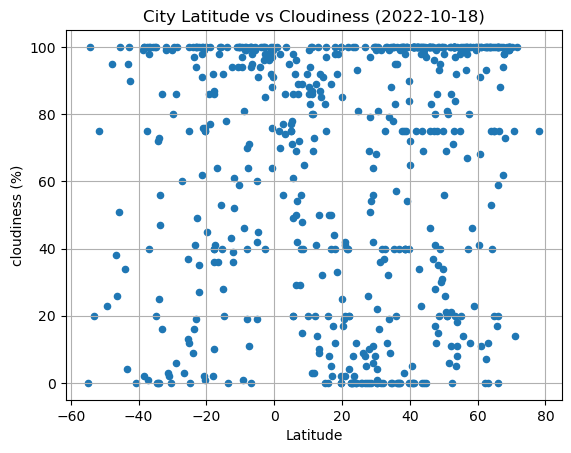

In [10]:
# Build the scatter plots for latitude vs. cloudiness
lat_vs_temp = city_data_df.plot(kind="scatter",x="Lat", y="Cloudiness",grid=True,title="City Latitude vs Cloudiness (2022-10-18)",xlabel="Latitude",ylabel="cloudiness (%)")
lat_vs_temp.get_figure().savefig("../output_data/Latitude_vs_cloudiness.png")

# Show plot
#plt.show()

#### Latitude vs. Wind Speed Plot

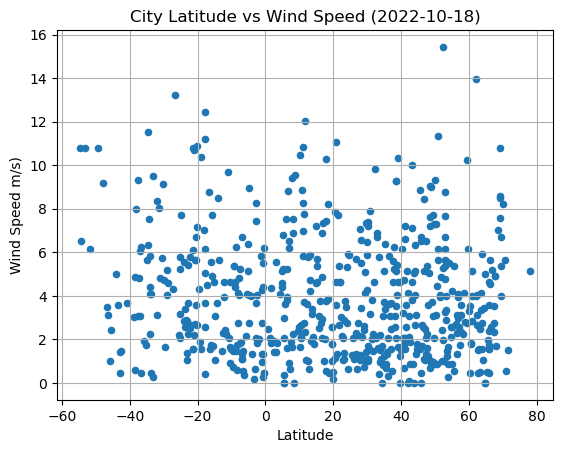

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat_vs_temp = city_data_df.plot(kind="scatter",x="Lat", y="Wind Speed",grid=True,title="City Latitude vs Wind Speed (2022-10-18)",xlabel="Latitude",ylabel="Wind Speed m/s)")
lat_vs_temp.get_figure().savefig("../output_data/Latitude_vs_Windspeed.png")

# Show plot
#plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_reg(x_val,y_val,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
     
    regress_values = x_val * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.plot(x_val,regress_values,"r-")
    plt.scatter(x_val,y_val)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_cities_count = len(northern_hemi_df)
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,13.18,88,100,0.89,US,1702228135
4,fuyang,32.9000,115.8167,3.04,87,100,6.88,CN,1702228207
7,shchigry,51.8755,36.9043,-6.10,95,100,4.88,RU,1702228207
8,college,64.8569,-147.8028,-20.61,77,75,0.00,US,1702228208
11,nuuk,64.1835,-51.7216,-1.66,74,40,1.03,GL,1702228160


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
southern_cities_count = len(southern_hemi_df)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,9.81,50,0,10.80,AR,1702227977
2,manokwari,-0.8667,134.0833,26.25,82,92,4.26,ID,1702228206
3,adamstown,-25.0660,-130.1015,21.02,62,75,5.24,PN,1702228206
5,kirakira,-10.4544,161.9205,25.25,91,100,1.63,SB,1702228207
6,bredasdorp,-34.5322,20.0403,18.89,65,0,6.32,ZA,1702228207


###  Temperature vs. Latitude Linear Regression Plot

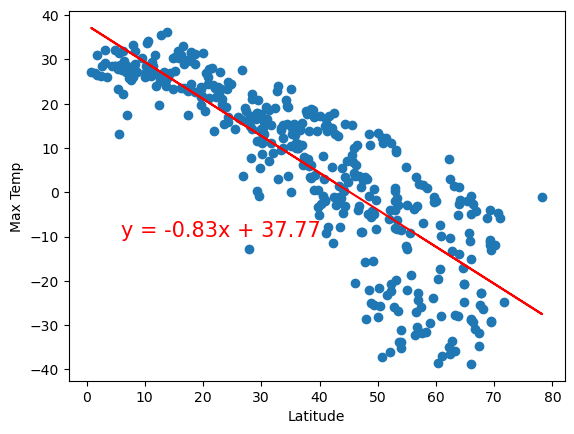

In [15]:
# Build scatter plot with linear regression for Northern Hemisphere for Temperature (C) vs. Latitude
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Max Temp"]
plot_reg(x_val, y_val, "Max Temp",(6,-10))

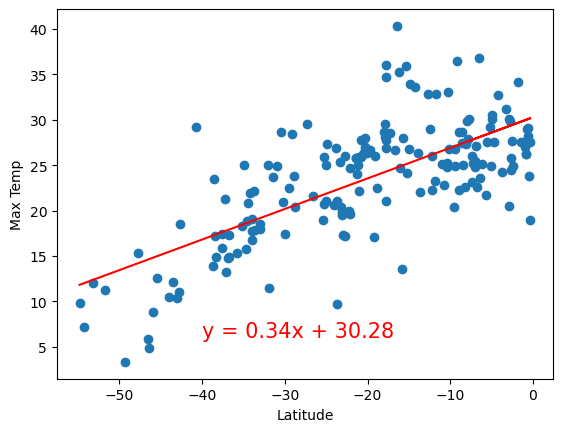

In [25]:
# Linear regression on Southern Hemisphere
# Build scatter plot with linear regression for Southern Hemisphere for Temperature (C) vs. Latitude
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Max Temp"]
plot_reg(x_val, y_val, "Max Temp",(-40,6))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

The Max Temperature vs. Latitude plot for cities in the northern hemisphere is shown above. 
The max temperature appears show a strong negative linear relationship with latitudes in the northern hemisphere, 
with an r-value of -0.86 for the linear best-fit regression line.
The higher the latitude degree lower the max temprature and Lower the latitude degree higher the max temprature
It has negative coefficient indicates there is negative linear relationship

The Max Temperature vs. Latitude plot for cities in the Southern hemisphere is shown above. 
with an r-value of  for the linear best-fit regression line.
The higher the latitude degree higher the max temprature and vice versa
It has positive coefficient indicates there is positive linear relationship



### Humidity vs. Latitude Linear Regression Plot

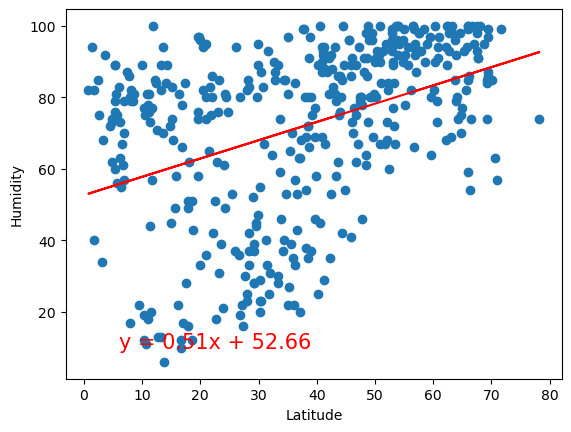

In [29]:
# Northern Hemisphere
# Northern Hemisphere: Humidity (%) vs. Latitude
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Humidity"]
plot_reg(x_val, y_val, "Humidity",(6,10))

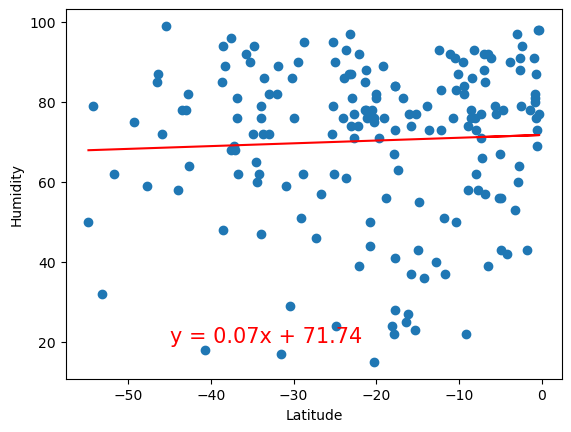

In [33]:
# Southern Hemisphere
#Southern Hemisphere: Humidity (%) vs. Latitude
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Humidity"]
plot_reg(x_val, y_val, "Humidity",(-45,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The Max Humidity vs. Latitude plot for cities in the northern hemisphere is shown above. 
The max Humidity appears show a strong positive linear relationship with latitudes in the northern and southern hemisphere, 
with an r-value of   or the linear best-fit regression line.
The higher the Humidity and higher the latitude degree for northern and sothern hemispere
It has positive coefficient indicates there is positive linear relationship


### Cloudiness vs. Latitude Linear Regression Plot

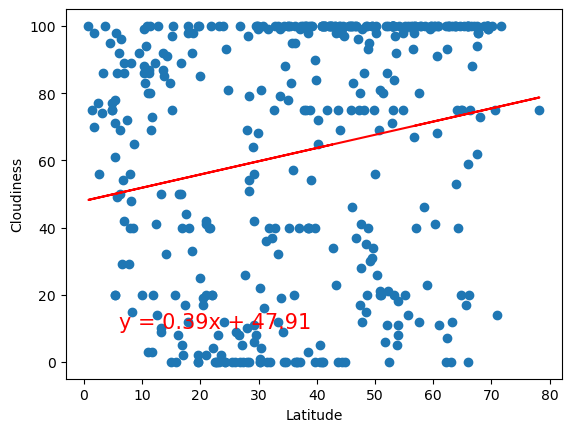

In [35]:
# Northern Hemisphere
#Northern Hemisphere: Cloudiness (%) vs. Latitude 
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Cloudiness"]
plot_reg(x_val, y_val, "Cloudiness",(6,10))

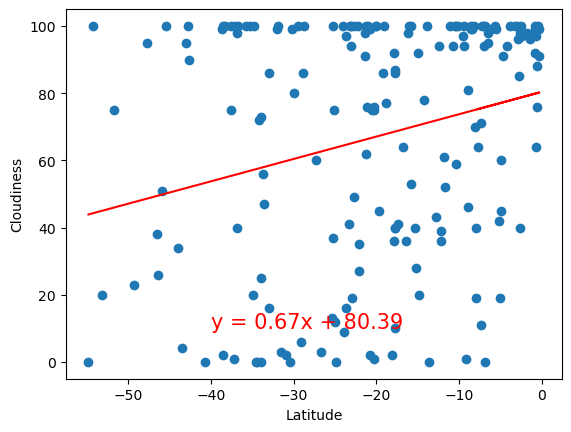

In [37]:
# Southern Hemisphere
#Southern Hemisphere: Cloudiness (%) vs. Latitude
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Cloudiness"]
plot_reg(x_val, y_val, "Cloudiness",(-40,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The Max cloudiness vs. Latitude plot for cities in the northern hemisphere is shown above. 
The max clousiness appears show a strong positive linear relationship with latitudes in the northern and southern hemisphere, 
with an r-value of   or the linear best-fit regression line.
The higher the latitude degree the higher the cloudiness in northern and sothern hemispere 
and lower the latitude degree lower the cloudiness in northern and sothern hemispere 
It has positive coefficient indicates there is positive linear relationship


### Wind Speed vs. Latitude Linear Regression Plot

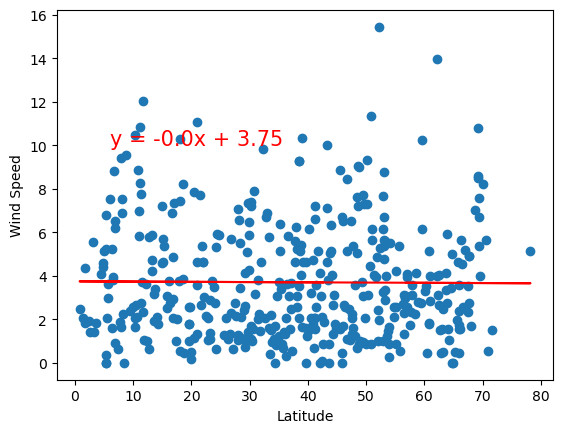

In [38]:
# Northern Hemisphere
#Northern Hemisphere: Wind Speed (m/s) vs. Latitude
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Wind Speed"]
plot_reg(x_val, y_val, "Wind Speed",(6,10))

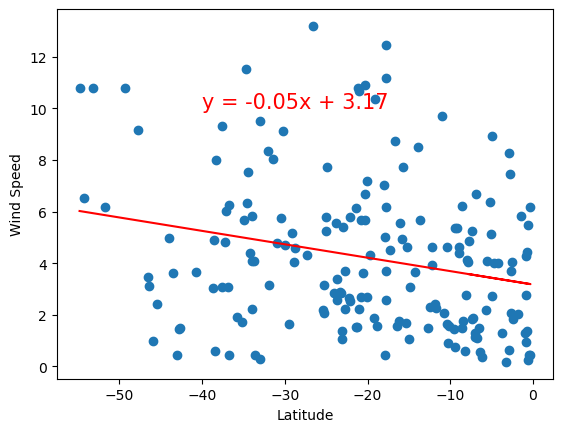

In [41]:
# Southern Hemisphere
#Southern Hemisphere: Wind Speed (m/s) vs. Latitude (5 points)
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Wind Speed"]
plot_reg(x_val, y_val, "Wind Speed",(-40,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The wind speed vs. Latitude plot for cities in the northern hemisphere is shown above. 
The higher or the lower the latitude the cloudiness remain constant in the northern hemisphere, 
with an r-value of -0.62 for the linear best-fit regression line.
there is no impact on wind speed with higher or lower the latitude degree.

The wind speed vs. Latitude plot for cities in the southern hemisphere is shown above. 
The higher the latitude degree lower the wind speed the impact on wind speed with the change in latitude degree is very low
The negative value of slope indicates the inverse relationship between latitude and wind speed.